In [1]:
import numpy as np
import soundfile as sf
import sounddevice as sd
import spectrogram as metrics
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:
file_path = '/Volumes/Omkar 5T/chips1.wav'
audio_data, _ = sf.read(file_path)

In [3]:
cutoff = 140
nyq = 0.5*2200
normal_cutoff = cutoff/nyq
b, a = butter(5, normal_cutoff, btype='high', analog=False)
S_x = filtfilt(b, a, audio_data)

maxsx = np.max(S_x)
minsx = np.min(S_x)
if maxsx!=1.0 or minsx!=-1.0:
    range_val = maxsx - minsx
    S_x = 2*S_x/range_val
    newmx = np.max(S_x)
    offset = newmx-1.0
    S_x = S_x-offset

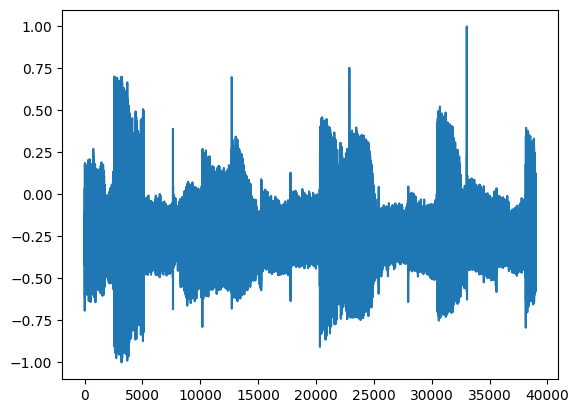

In [4]:
plt.plot(S_x)
plt.show()

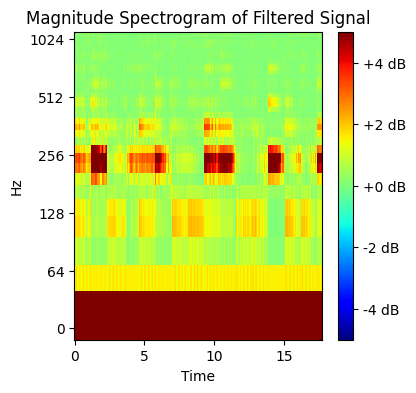

In [5]:
metrics.show_spectrogram(S_x, 2200, 80, 40, 'Filtered')

In [6]:
sd.play(S_x, samplerate=2200)
sd.wait()

KeyboardInterrupt: 